In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [24]:
data = pd.read_csv('data/snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [25]:
data = data.iloc[:, 4:]
data.shape

(30000, 36)

In [26]:
X = data.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

np.float64(-0.3322172643985876)

In [27]:
model = KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
model.inertia_

856276.6962467819

In [28]:
data.loc[:, 'label'] = model.labels_
data.label.value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

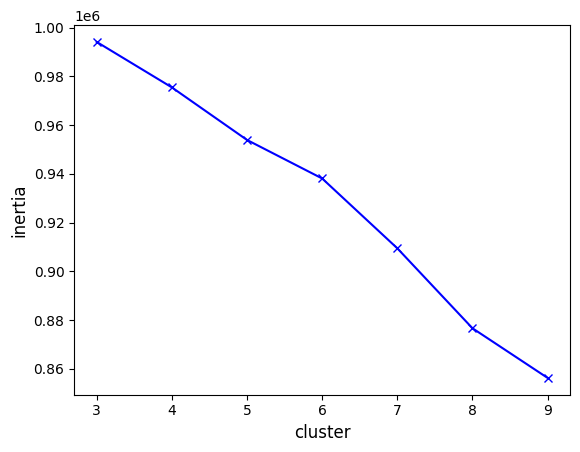

In [30]:
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

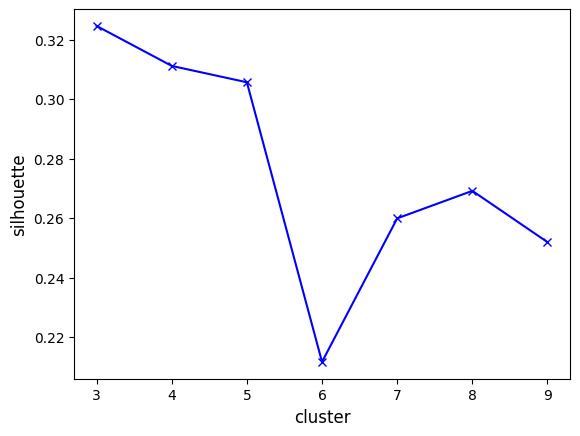

In [32]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

In [33]:
top_list = []
for label, group in data.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'god', 'hair'}

In [34]:
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X)
np.unique(predictions, return_counts=True)

(array([0, 1, 2]), array([21744,  5219,  3037]))

In [36]:
a = np.where(predictions == 2)
data.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,5
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,5
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4
46,0,0,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,2
54,0,0,1,0,0,1,0,0,0,0,...,0,0,2,1,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,1,0,0,3,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29972,0,0,0,0,1,1,0,0,0,0,...,1,3,1,2,0,0,0,0,0,5
29979,0,3,0,0,0,0,1,0,2,1,...,1,1,0,0,0,1,1,1,1,4
29986,0,1,0,0,0,1,0,0,0,3,...,0,1,0,2,2,0,0,2,0,5
